In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST)

Practice of using datablock and dataloader

In [4]:
mnist = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
    get_y=parent_label)

In [5]:
#mnist = mnist.new(
#    item_tfms=RandomResizedCrop(28*28, min_scale=0.5),
#    batch_tfms=aug_transforms())

In [6]:
mnist = mnist.new(
    batch_tfms=aug_transforms())

In [7]:
dls = mnist.dataloaders(path, bs=16)

Data is easily loaded using ImageDataLoaders

In [8]:
#dls = ImageDataLoaders.from_folder(path, train='training', valid='testing', bs=64)
#learn = cnn_learner(dls, resnet18, pretrained=False, metrics=accuracy)

To verify the images and the labels are matched correctly,

In [9]:
#dls.train.show_batch()

Assigning a model

In [10]:
learn = cnn_learner(dls, resnet18, pretrained=False, metrics=accuracy)

Find the best learning rate via lr.find()

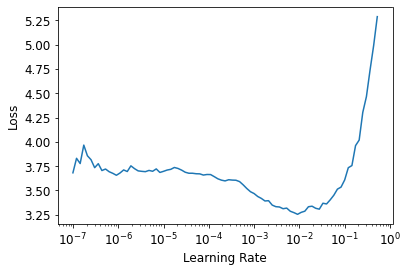

In [11]:
lr_min,lr_steep = learn.lr_find()

In [12]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 9.12e-04, steepest point: 2.09e-03


Use the result of lr.find() and start training

In [13]:
learn.fit_one_cycle(1, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.176215,0.055869,0.982300,01:54


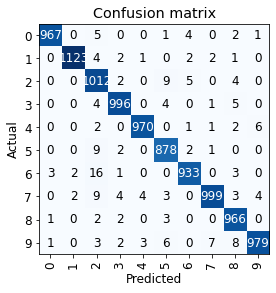

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

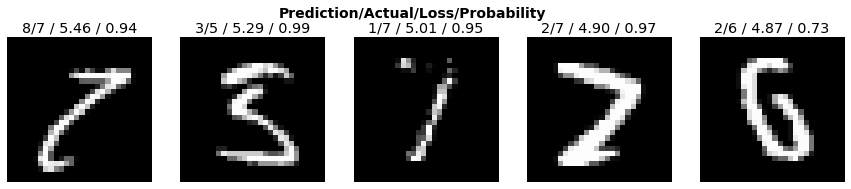

In [15]:
interp.plot_top_losses(5, nrows=1)

In [16]:
learn.export()

In [17]:
path = Path('/home/ray/.fastai/data/mnist_png/')
path.ls(file_exts='.pkl')

(#1) [Path('/home/ray/.fastai/data/mnist_png/export.pkl')]

In [18]:
learn_inf = load_learner(path/'export.pkl')

In [19]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [26]:
img = PILImage.create(uploader.data[0])

In [27]:
learn_inf.predict(img)

('5',
 tensor(5),
 tensor([0.0254, 0.1597, 0.0658, 0.2295, 0.0076, 0.3306, 0.0340, 0.0466, 0.0752, 0.0258]))

In [28]:
num,_,probs = learn_inf.predict(img)
print(f"What number is this?: {num}.")
print(f"Probability it's a {num}: {1-probs[1].item():.6f}")

What number is this?: 5.
Probability it's a 5: 0.840263
